In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pptx import Presentation
from pptx.util import Inches

In [10]:
y_upper = 1
base_dir = "/Users/ayw1327/Documents/GitHub/cxr_thesis/4_class_results_bootstrap"

In [11]:



def plot_metrics(metrics_csv_path, y_upper):
    metrics_csv = pd.read_csv(metrics_csv_path)

    model_name = os.path.basename(os.path.dirname(metrics_csv_path))

    # Create a single plot
    plt.figure(figsize=(8, 6))
    plt.plot(metrics_csv['epoch'], metrics_csv['loss'], label='Training Loss')
    plt.plot(metrics_csv['epoch'], metrics_csv['val_loss'], label='Validation Loss')
    plt.ylim(0, y_upper)

    # Labels and title
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")  # Main title
    plt.suptitle(f"Model: {model_name}", fontsize=14, y=0.95)  # Subtitle
    plt.legend()


In [12]:


subdirs = sorted([d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))])



In [13]:
subdirs

['truncated_b0_reduced_layers_0_2025-03-03_19-14',
 'truncated_b0_reduced_layers_1_2025-03-03_21-55',
 'truncated_b0_reduced_layers_2_2025-03-04_00-23',
 'truncated_b0_reduced_layers_3_2025-03-04_02-36',
 'truncated_b0_reduced_layers_4_2025-03-04_04-40',
 'truncated_b0_reduced_layers_5_2025-03-04_06-31']

In [14]:


metrics_path_list = [f"{base_dir}/{subdir}/training_logs.csv" for subdir in subdirs]



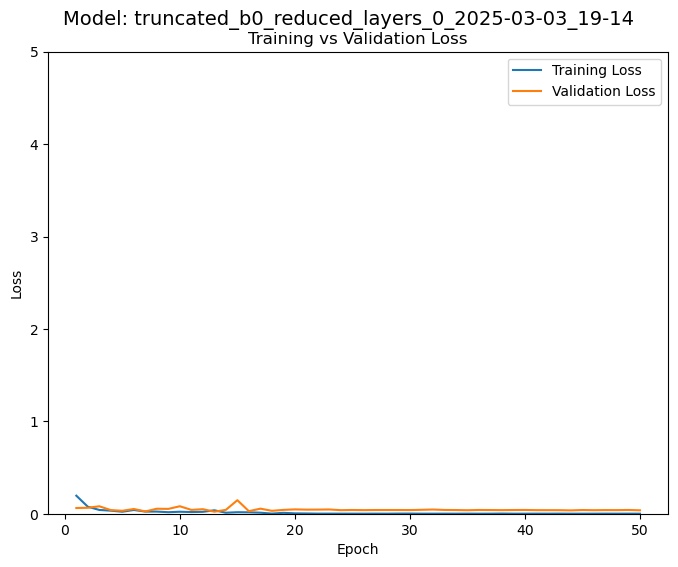

In [15]:
plot_metrics(metrics_csv_path=metrics_path_list[0], y_upper=5 )

In [16]:
# Create a PowerPoint presentation
prs = Presentation()

# Loop through each model and generate plots
for subdir in subdirs:
    metric_path = os.path.join(base_dir, subdir, "training_logs.csv")

    if os.path.exists(metric_path):
        # Load the CSV

        plot_metrics(metrics_csv_path=metric_path, y_upper=y_upper )

        # Save plot as an image
        img_path = f"{subdir}.png"
        plt.savefig(img_path)
        plt.close()

        # Add a new slide to PowerPoint
        slide = prs.slides.add_slide(prs.slide_layouts[6])  # Blank slide


        # Add the image to the slide
        left = Inches(1)
        top = Inches(1.5)
        slide.shapes.add_picture(img_path, left, top, width=Inches(8))

        # Remove the image after adding it to avoid clutter
        os.remove(img_path)

# Save the PowerPoint
ppt_path = "training_results_4_class.pptx"
prs.save(ppt_path)
print(f"PowerPoint saved as {ppt_path}")


PowerPoint saved as training_results_4_class.pptx
